# Домашнее задание по теме «Машинное обучение»

Сегодня ты разберёшь задачу классификации для датасета Predict Pet Adoption Status Dataset. По характеристикам животного надо предсказать, заберут ли его из приюта.

## Подготовка

In [12]:
!gdown --id 1ckVbIobQRQvh3V1yVGAWY6QwFicJb7ul -O ../Datasets/2.1.csv

zsh:1: command not found: gdown


In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('../Datasets/2.1.csv', index_col=0)

In [15]:
df

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
PetID,,,,,,,,,,,,
500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0


Изучи переменные в данных:

* `PetType` — тип животного (например, птица, кролик, собака).
* `Breed` — порода.
* `AgeMonths` — возраст  в месяцах.
* `Color` — цвет.
* `Size` — размер.
* `WeightKg` — вес.
* `Vaccinated` — есть ли прививка (0 — нет, 1 — да).
* `HealthCondition` — здоровое или больное животное (0 — здоровое, 1 — больное).
* `TimeInShelterDays` — количество дней в приюте.
* `AdoptionFee` — сколько стоит забрать животное из приюта.
* `PreviousOwner` — был ли у животного уже хозяин (0 — нет, 1 — да).
* `AdoptionLikelihood`— найдут ли хозяина животному (0 — низкая вероятность, 1 — высокая вероятность). Это целевая переменная.

In [16]:
df.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


## Задача 1. Разделение датасета на `train`, `val` и `test` [4 балла]

Сначала необходимо разбить выборку на обучающую, валидационную и тестовую. Для этого нужно выбрать переменную, по которой будут сбалансированно разделяться данные. Чтобы решить эту задачу было проще, выбирай только категориальные переменные.

Что нужно сделать:

1. Визуализировать разделение на `train` и `val` по всем категориальным переменным. **[1 балл]**

2. Предложить разделение по некоторой категориальной переменной так, чтобы распределения по другим переменным были похожи между валидационной и обучающей выборкой. Обосновать своё решение, ориентируясь на визуализацию. **[2 балла]**

  > **Важно.** Помни, что целевая переменная тоже категориальная. Обязательно рассмотри ее в процессе анализа.


3. Сделать разбиение на `train`, `val` и `test` по выбранной переменной. **[1 балл]**

Как будет выглядеть твоя визуализация (вся сложная часть кода уже написана):
  * Большое полотно с множеством гистограмм.
  * Каждая строка полотна соответствует разбиению по одной из категориальных переменных.
  * По столбцам каждой строки полотна изображены гистограммы переменных, по которым разбиение не делали. Изображать переменную, по которой делали разбиение, не имеет смысла, так как она будет максимально сбалансированной.
  * Все оси подписаны, названия графиков и легенды выведены.

In [17]:
# Эти библиотеки тебе пригодятся
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Решение задачи 1

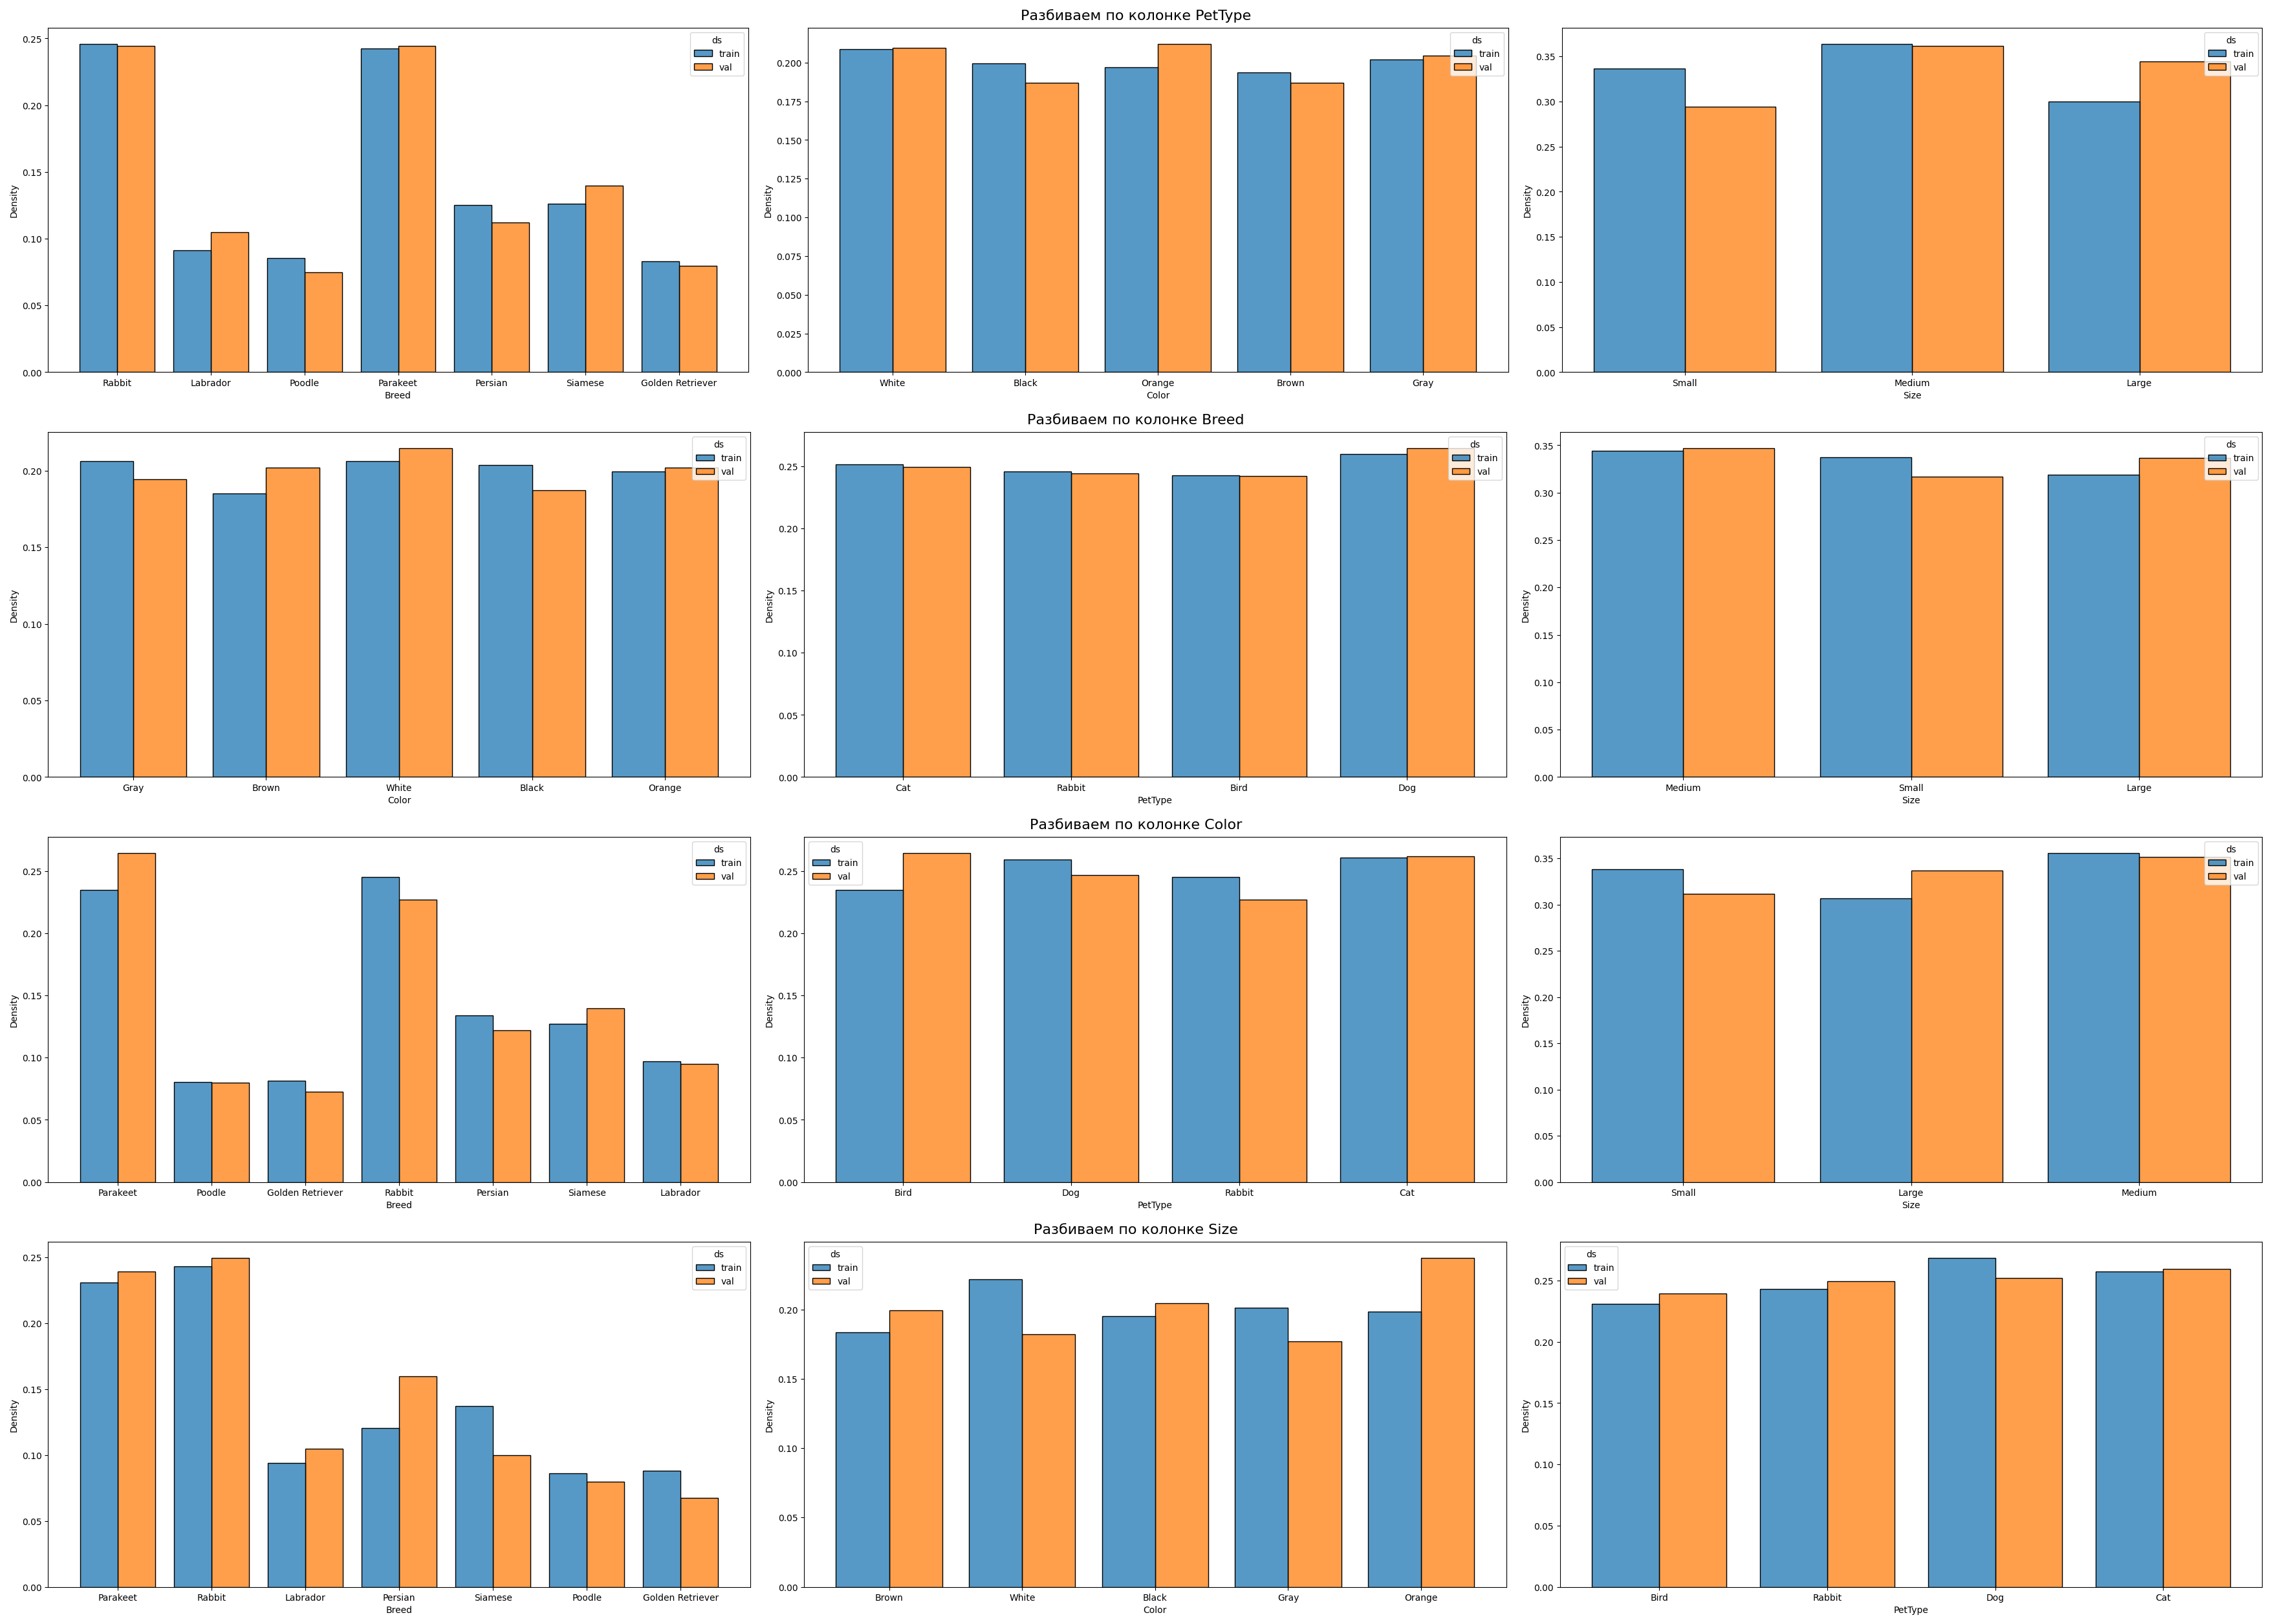

In [18]:
# 1. Визуализация разбиений по всем категориальным переменным
cat_cols = [*df.select_dtypes(include=['object', 'category'])] # Все категориальные колонки в виде списка строк
num_cols = [*df.select_dtypes(include=['integer', 'float'])]
# Тело графика
fig, axs = plt.subplots(len(cat_cols), 1, figsize=(35, 25), constrained_layout=True) # Создаём строки, в которые будем вставлять уже столбцы графиков
for ax in axs.ravel():
  ax.axis('off')

# Сетка, по которой будем вставлять картинки в каждую строку
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for subfig, stratify_col in zip(subfigs, cat_cols):
  # Разбиваем по нашей колонке интереса на train, val и test
  X_train, X_val, y_train, y_val = train_test_split(df.drop(
      'AdoptionLikelihood', axis=1), df['AdoptionLikelihood'], train_size=0.6, random_state=123, stratify=df[stratify_col])
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=0.5, random_state=123, stratify=X_val[stratify_col])

  # Для удобства визуализации собираем всё в один датасет, как было на семинаре
  X_train['ds'] = 'train'
  X_val['ds'] = 'val'
  X_train_val = pd.concat([X_train, X_val])
  X_train_val = X_train_val.astype(str) # Необходимо для корректной работы для бинарных переменных, которые в данных записаны в виде int

  # Подписываем каждую строку
  subfig.suptitle(f'Разбиваем по колонке {stratify_col}', fontsize=16)

  # Добавляем в каждую строку графики по количеству переменных, за исключением переменной, по которой разбиваем
  axs = subfig.subplots(nrows=1, ncols=len(cat_cols)-1)

  for ax, col in zip(axs, sorted(set(cat_cols) - set([stratify_col]))):
    sns.histplot(data=X_train_val, x=col, hue='ds', stat='density', common_norm=False, multiple='dodge', shrink=0.8, ax=ax)

plt.show()

2. Предложи разбиение, которое считаешь наиболее сбалансированным. Обоснуй, почему ты так считаешь.

**Твой ответ**



In [19]:
# 3. Сделай разбиение по выбранной переменной на данных. Следи, чтобы целевая переменная не попала к объясняющим переменным
X_train, X_val, y_train, y_val = train_test_split(
    df.drop('AdoptionLikelihood', axis=1), df['AdoptionLikelihood'], train_size=0.6, random_state=123, stratify=df['PetType'])
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, train_size=0.5, random_state=123, stratify=X_val['PetType']) 


## Задача 2. OHE-обработка категорий и выбор алгоритма для обучения [3 балла]

После разделения данных на `train`, `val` и `test` нужно обучить модель машинного обучения. В этой задаче тебе нужно преобразовать категории к OHE и выбрать лучшую модель для задачи классификации.

Что нужно сделать:
1. Применить OHE из `sklearn` **[1 балл]**:
  * обучить его `train`-подвыборке;
  * применить результаты к `val` и `test`.
2. Выбрать 4 различные модели для классификации из библиотеки `sklearn` (рекомендуется взять LogisticRegression, чтобы проще было решать четвёртое задание на бонусные баллы). **[0 баллов]**
  > **Примечание.** Нормально, что ты до сих пор не понимаешь, что это за модели. С ними мы будем знакомиться в следующих занятиях. Сейчас важно показать, как ты будешь выстраивать пайплайн обучения, для этого сама модель и качество не важны.
3. Обучить каждую, получить предсказания для `train`- и `val`-подвыборок. **[1 балл]**
4. Посчитать метрику [Accuracy](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html) для `train` и `val`. **[0,5 балла]**
5. На основе валидации выбрать модель для дальнейшей работы, написать свои мысли по поводу переобучения. **[0,5 балла]**

Метрика Accuracy имеет вид:

$$Acc = \frac{1}{n}∑_{i=1}^nI[y_i = \hat{y_i}]\text,  \\
\text{где n — количество наблюдений;} \\
y_i \text{ — истинная метка класса для i-го наблюдения;} \\
\hat{y_i} \text{ — предсказанная метка класса для i-го наблюдения.}$$

## Решение задачи 2

In [20]:
# 1. Примени OHE
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# Обучаем на train-выборке и переносим на остальные
# Вынеси выбор колонок в отдельную переменную, так будет удобнее
ohe_train = ohe.fit_transform(X_train[cat_cols]).toarray()
ohe_val = ohe.transform(X_val[cat_cols]).toarray()
ohe_test = ohe.transform(X_test[cat_cols]).toarray()

# Исключи категориальные колонки из данных
X_train_num = X_train.drop(columns=cat_cols)
X_val_num = X_val.drop(columns=cat_cols)
X_test_num = X_test.drop(columns=cat_cols)

# Добавь к датасетам OHE-кодировки
X_train_ohe = np.hstack([X_train_num.to_numpy(), ohe_train])
X_val_ohe = np.hstack([X_val_num.to_numpy(), ohe_val])
X_test_ohe = np.hstack([X_test_num.to_numpy(), ohe_test])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# 2, 3, 4 Обучи модель, получи предсказание, посчитай метрику и выбери лучшую модель
for name, model in zip(['логрег', "knn", "решающиеДеревья", "Гауссиан"], [LogisticRegression(n_jobs=-1), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB()]): # Впиши названия моделей и инициализируй сами модели
  model.fit(X_train_ohe, y_train)
  # Обучаем модель
  train_pred = model.predict(X_train_ohe) 
  val_pred = model.predict(X_val_ohe)


  # На 100 домножение, чтобы к % перевести
  train_acc = accuracy_score(y_train, train_pred) * 100
  val_acc = accuracy_score(y_val, val_pred) * 100

  print(f'Accuracy на train для {name} = {train_acc}%')
  print(f'Accuracy на val для {name} = {val_acc}%')

Accuracy на train для логрег = 90.69767441860465%
Accuracy на val для логрег = 89.27680798004988%
Accuracy на train для knn = 75.0%
Accuracy на val для knn = 66.08478802992519%
Accuracy на train для решающиеДеревья = 100.0%
Accuracy на val для решающиеДеревья = 88.5286783042394%
Accuracy на train для Гауссиан = 86.29568106312291%
Accuracy на val для Гауссиан = 85.03740648379052%


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Задача 3. Подбор параметров для модели и проверка результатов на test [3 балла]

Теперь нужно подобрать параметры выбранной модели, как мы это делали на семинаре.

Что нужно сделать:
1. Посмотреть документацию выбранной модели и выбрать два параметра для перебора. **[0 баллов]**
> **Примечание.** Тебе не надо знать, что они значат. Попробуй разные варианты разных параметров.
2. Запустить по ним цикл в цикле и выбрать лучшее сочетание. Лучшую модель, её параметры и результаты метрики для `train` и `val` проще хранить в отдельных переменных. **[1 балл]**
3. Получить предсказание для `test`-подвыборки и оценить его качество по метрике. **[1 балл]**
4. Описать полученные результаты. **[1 балл]**

> **Важно.** Так как теперь нужно следить за метрикой, а не за функцией потерь, не стоит бездумно копировать код с семинара. Для корректной работы надо его изменить.

## Решение задачи 3


In [ ]:
# 1, 2 Выбираем параметры и выбираем лучшие
# Будем сохранять лучшие резульаты
best_val = 0
best_model = None
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
  for penalty in ["l1", "l2", "elasticnet", None]:
    for solver in ["liblinear", 'lbfgs', 'sag']:
      try:
        model = LogisticRegression(C=c, penalty=penalty, solver=solver)
        # Обучаем модель
        model.fit(X_train_ohe, y_train)
        train_preds = model.predict(X_train_ohe)
        val_preds = model.predict(X_val_ohe)
        acc_train = accuracy_score(y_train, train_preds) * 100
        acc_val = accuracy_score(y_val, val_preds) * 100
        if best_val < acc_val:
          best_val = acc_val
          best_train = acc_train
          best_model = model
          best_params = {"C":c, "penalty":penalty, 'solver': solver}
          print(f'На обучающей выборке лучшее значение Acc = {best_train}%')
          print(f'На валидационной выборке лучшее значение Acc = {best_val}%')
          print(best_params)
          best_model = model
      except ValueError: # знаю что так не стоит делать, лень прописывать все условия несовпаденийЯ
        continue
print()

print(f'На обучающей выборке лучшее значение Acc = {best_train}%')
print(f'На валидационной выборке лучшее значение Acc = {best_val}%')
print(best_params)

На обучающей выборке лучшее значение Acc = 67.77408637873754%
На валидационной выборке лучшее значение Acc = 65.08728179551122%
{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
На обучающей выборке лучшее значение Acc = 70.09966777408638%
На валидационной выборке лучшее значение Acc = 66.83291770573567%
{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/l

На обучающей выборке лучшее значение Acc = 90.9468438538206%
На валидационной выборке лучшее значение Acc = 89.27680798004988%
{'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/l

На обучающей выборке лучшее значение Acc = 91.0299003322259%
На валидационной выборке лучшее значение Acc = 89.52618453865337%
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

На обучающей выборке лучшее значение Acc = 90.86378737541528%
На валидационной выборке лучшее значение Acc = 89.77556109725685%
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/l

На обучающей выборке лучшее значение Acc = 90.9468438538206%
На валидационной выборке лучшее значение Acc = 90.02493765586036%
{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

На обучающей выборке лучшее значение Acc = 90.9468438538206%
На валидационной выборке лучшее значение Acc = 90.02493765586036%
{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [25]:
# 3. Получаем предсказания для test
test_preds = best_model.predict(X_test_ohe)
acc_test = accuracy_score(test_preds, y_test) * 100
print(f'На тестовой выборке лучшее значение Acc = {acc_test}%')

На тестовой выборке лучшее значение Acc = 92.7860696517413%


4. Что получилось? Как дела с переобучением?

**Твой ответ**
Переобучения нет, поскольку Val_acc=train_acc=test_acc в пределах допустимых значений. Есть dataleak поскольку мы делаем стратификацию на всей выборке, а надо только на обучающей, в целом нормально, но полпроцента бы выиграли наверное)


## Задача 4. Нормализация данных [2 бонусных балла]

Если в задаче 2 была использована логистическая регрессия, то, скорее всего, получено также неплохое качество относительно других алгоритмов (>90%).

Но логистическая регрессия, как и другие линейные алгоритмы (в том числе SVM), не очень хорошо работает на ненормализованных признаках.

**Пример.** Переменная `AdoptionFee` имеет значения от 0 до 500. А вес животных от 2 до 30 кг. То есть у данных переменных — разная размерность, что плохо для линейных алгоритмов.

Но мы можем стандартизовать (нормализовать) наши данные, а именно вычесть среднее и поделить на стандартное отклонение значения каждой переменной.

И для этого в `sklearn` уже реализован [функционал](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html).

Что нужно сделать:
1. Для логистической регрессии стандартизовать вещественные переменные (OHE категориальные трогать не надо). Обучаем наш StandartScaler на `train`, далее применяем к `val` и `test`. **[0,5 балла]**
2. Посмотреть на результаты `train` и `val` и проверить, стало ли лучше. **[0,5 балла]**
3. Перебрать параметр `C` и выбрать лучший. **[0,25 балла]**
4. Получить предсказания и вычислить метрику для `test`. **[0,25 балла]**
5. Описать результат экспериментов. **[0,5 балла]**.

## Решение задачи 4

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# 1. Обучаем StandardScaler. Важно, что его нужно применить только для числовых переменных. Для закодированных OHE переменных этого делать не надо
# Например, можно просто преобразовать первые 4 колонки наших данных
num_cols = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
num_indices = [X_train.columns.get_loc(col) for col in num_cols]
sc = StandardScaler()
X_train_num_scaled = sc.fit_transform(X_train_ohe[:, num_indices]) #train
X_val_num_scaled = sc.transform(X_val_ohe[:, num_indices]) # val
X_test_num_scaled = sc.transform(X_test_ohe[:, num_indices])# test

ohe_start_index = len(num_cols)

X_train_scaled = np.hstack([X_train_num_scaled, X_train_ohe[:, ohe_start_index:]])  # train
X_val_scaled = np.hstack([X_val_num_scaled, X_val_ohe[:, ohe_start_index:]])       # val
X_test_scaled = np.hstack([X_test_num_scaled, X_test_ohe[:, ohe_start_index:]])    # test

In [34]:
from sklearn.preprocessing import StandardScaler
# 2. Обучи модель, получи предсказания и посмотри на метрику
model = LogisticRegression(**best_params)
model.fit(X_train_scaled, y_train)
train_preds = model.predict(X_train_scaled)
val_preds = model.predict(X_val_scaled)
acc_train = accuracy_score(y_train, train_preds) * 100
acc_val = accuracy_score(y_val, val_preds) * 100
print(f'Accuracy на train для Логистической регрессии = {train_acc}%')
print(f'Accuracy на val для Логистической регрессии = {val_acc}%')

Accuracy на train для Логистической регрессии = 86.29568106312291%
Accuracy на val для Логистической регрессии = 85.03740648379052%


/home/rlohaw/Homeworks/AI/2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Напиши, есть ли улучшения.

Нет, нету, поскольку надо перебирать параметры и для нормированного пространства, также хорошо будет нормировать таргет для лучшей сходимости

In [35]:
# 3. Перебери параметр C для логистической регрессии
#Уже перебрали
print(f'На обучающей выборке лучшее значение Acc = {best_train}%')
print(f'На валидационной выборке лучшее значение Acc = {best_val}%')

На обучающей выборке лучшее значение Acc = 90.9468438538206%
На валидационной выборке лучшее значение Acc = 90.02493765586036%


In [37]:
# 4. Получи предсказания для test и посмотри на метрику

test_preds = model.predict(X_test_scaled)
acc_test = accuracy_score(y_test, test_preds) * 100
print(f'На тестовой выборке лучшее значение Acc = {acc_test}%')

На тестовой выборке лучшее значение Acc = 90.04975124378109%


5. Напиши выводы на основе полученных результатов.

1. Стоит стратифицировать для баланса классов выборки
2. Стоит делать scale, категориальные фичи можно кодировать различными способами, также смотреть как изменяется от этого скор и т.д и т.п
3. Применяя стандартизацию мы переходим в нормированное пространство, что для некоторых мл алгоритмов удобнее, допустим как в knn